In [72]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import seaborn as sns
from scipy.stats import linregress
from scipy.optimize import curve_fit
import sympy

import PythonGraphMod

# import math

In [73]:
# введем массивы данных
# количество частиц, зарегистрированных для разных типов заглужек (n')

Al = np.array([12482.5, 6790.3, 3832.06, 2302.06, 1402.93])
Fe = np.array([10371.5, 4706.9, 2224.46, 1112.21, 616.01])
Pb = np.array([11093.8, 4950.75, 2447.51, 1243.05, 682.98])

# количество заглушек
l_num = np.array([1, 2, 3, 4, 5])

# толщина заглушек для каждого материала
Al_l = 20  # mm
Fe_l = 10  # mm
Pb_l = 4.8 # mm

# количество частиц в фоне (n_фон')
n_f = 100.15
# начальное число частиц (без заглушки -- n0')
n0 = 29111.5

# вычитаем фон
Al = Al - n_f
Fe = Fe - n_f
Pb = Pb - n_f

Al: mu = (280.74 +- 5.92) * 10^-3 1/см


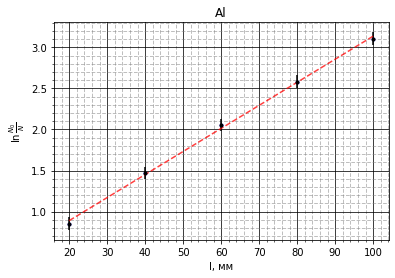

In [74]:
fig1, ax1 = PythonGraphMod.CreateSimpleGraph()

lin1 = linregress(l_num*Al_l, np.log(n0/Al))

ax1.scatter(l_num*Al_l, np.log(n0/Al), color='blue', marker='o', s=8, alpha=1)
plt.errorbar(l_num*Al_l, np.log(n0/Al), yerr=0.0774, xerr=0.05, fmt='.', ecolor='black', color='black')
ax1.plot(l_num*Al_l, lin1.intercept + lin1.slope * l_num*Al_l, color='red', alpha=0.75, lw=1.5, ls='--')

# сетка
ax1.minorticks_on()
ax1.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax1.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
plt.title('Al')
plt.ylabel(r'$\ln \frac{N_0}{N}$')
plt.xlabel('l, мм')

fig1.savefig("../images/Al.pdf")

# посчитаем коэффициент наклона и таким образом найдем значение константы mu
print('Al: mu = (%0.2f +- %0.2f) * 10^-3 1/см' %(lin1.slope*10000, lin1.stderr*10000))

Fe: mu = (749.81 +- 14.28) * 10^-3 1/см


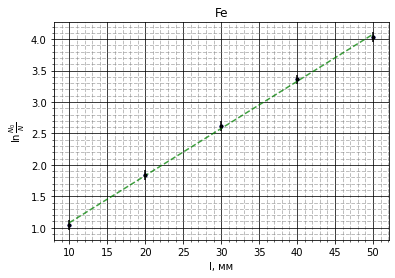

In [75]:
fig2, ax2 = PythonGraphMod.CreateSimpleGraph()

lin2 = linregress(l_num*Fe_l, np.log(n0/Fe))

ax2.scatter(l_num*Fe_l, np.log(n0/Fe), color='blue', marker='o', s=8, alpha=1)
plt.errorbar(l_num*Fe_l, np.log(n0/Fe), yerr=0.0774, xerr=0.05, fmt='.', ecolor='black', color='black')
ax2.plot(l_num*Fe_l, lin2.intercept + lin2.slope * l_num*Fe_l, color='green', alpha=0.75, lw=1.5, ls='--')

# сетка
ax2.minorticks_on()
ax2.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax2.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
plt.ylabel(r'$\ln \frac{N_0}{N}$')
plt.xlabel('l, мм')
plt.title('Fe')

fig2.savefig("../images/Fe.pdf")

# посчитаем коэффициент наклона и таким образом найдем значение константы mu
print('Fe: mu = (%0.2f +- %0.2f) * 10^-3 1/см' %(lin2.slope*10000, lin2.stderr*10000))

Pb: mu = (1524.98 +- 31.10) * 10^-3 1/см


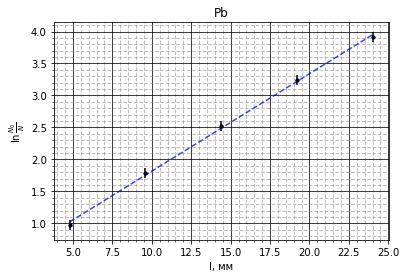

In [76]:
fig3, ax3 = PythonGraphMod.CreateSimpleGraph()

lin3 = linregress(l_num*Pb_l, np.log(n0/Pb))

ax3.scatter(l_num*Pb_l, np.log(n0/Pb), color='blue', marker='o', s=8, alpha=1)
plt.errorbar(l_num*Pb_l, np.log(n0/Pb), yerr=0.0774, xerr=0.05, fmt='.', ecolor='black', color='black')
ax3.plot(l_num*Pb_l, lin3.intercept + lin3.slope * l_num*Pb_l, color='blue', alpha=0.75, lw=1.5, ls='--')

# сетка
ax3.minorticks_on()
ax3.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax3.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
plt.ylabel(r'$\ln \frac{N_0}{N}$')
plt.xlabel('l, мм')
plt.title('Pb')

fig3.savefig("../images/Pb.pdf")

# посчитаем коэффициент наклона и таким образом найдем значение константы mu
print('Pb: mu = (%0.2f +- %0.2f) * 10^-3 1/см' %(lin3.slope*10000, lin3.stderr*10000))

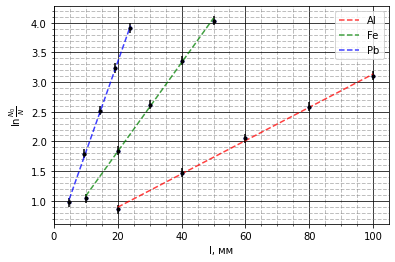

In [77]:
fig4, ax4 = PythonGraphMod.CreateSimpleGraph()

ax4.scatter(l_num*Al_l, np.log(n0/Al), color='blue', marker='o', s=8, alpha=1)
plt.errorbar(l_num*Al_l, np.log(n0/Al), yerr=0.0774, xerr=0.05, fmt='.', ecolor='black', color='black')
ax4.plot(l_num*Al_l, lin1.intercept + lin1.slope * l_num*Al_l, color='red', alpha=0.75, lw=1.5, ls='--', label='Al')

ax4.scatter(l_num*Fe_l, np.log(n0/Fe), color='blue', marker='o', s=8, alpha=1)
plt.errorbar(l_num*Fe_l, np.log(n0/Fe), yerr=0.0774, xerr=0.05, fmt='.', ecolor='black', color='black')
ax4.plot(l_num*Fe_l, lin2.intercept + lin2.slope * l_num*Fe_l, color='green', alpha=0.75, lw=1.5, ls='--', label='Fe')

ax4.scatter(l_num*Pb_l, np.log(n0/Pb), color='blue', marker='o', s=8, alpha=1)
plt.errorbar(l_num*Pb_l, np.log(n0/Pb), yerr=0.0774, xerr=0.05, fmt='.', ecolor='black', color='black')
ax4.plot(l_num*Pb_l, lin3.intercept + lin3.slope * l_num*Pb_l, color='blue', alpha=0.75, lw=1.5, ls='--', label='Pb')

# сетка
ax4.minorticks_on()
ax4.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax4.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
plt.ylabel(r'$\ln \frac{N_0}{N}$')
plt.xlabel('l, мм')
plt.legend()

fig4.savefig("../images/AlFePb.pdf")